In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# get covid data 

URL = "https://api.covid19api.com/summary"

try:
    r = requests.get(URL)
    res = r.json()
except:
    print("API failed to connect")

In [3]:
# organize relevant data

global_new = res["Global"]["NewConfirmed"]
country_data = res["Countries"]

country_names = [i["Country"] for i in country_data]

country_new_cases = [int(round(100 * country_data[i]["NewConfirmed"] / global_new, 0)) for i in range(len(country_data))]

In [70]:
# make dataframe

df = pd.DataFrame({"Country": country_names, "Case_count": country_new_cases})


# which countries are doing poorly?

for i in range(len(df)):
    if df.loc[i]["Case_count"] > 10:
        print(df.loc[i]["Country"])


Brazil
India
United States of America


In [106]:
upper = 0
for i in range(len(country_new_cases)):
    if country_new_cases.count(i) > 0:
        upper = i

case_dist = {i:(country_new_cases.count(i) if country_new_cases.count(i) > 0 else 0) for i in range(upper + 1)}
df_2 = pd.DataFrame({"Count": case_dist})
df_2.head()

,Count
0,163
1,15
2,5
3,2
4,0


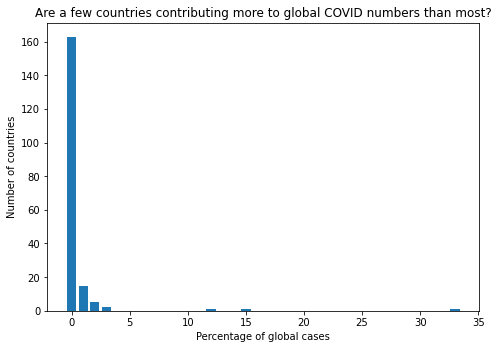

In [111]:
x_vals = np.arange(df_2["Count"].keys().max() + 1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_vals, df_2["Count"])
plt.xlabel("Percentage of global cases")
plt.ylabel("Number of countries")
plt.title("Are a few countries contributing more to global COVID numbers than most?")
plt.show()

Brazil is at 12%, the US is at 15%, and India is at 33% of all global cases reported on 9/20/20 for a combined 60% of the total global cases. So yeah, a few countries are contributing disproportionately to the COVID numbers.